# UNN

## Machine learning lab


Описание данных: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Этот набор данных, который включает в себя:
* Дата год-месяц-день час:минута:секунда 
* Температура, в градусах Цельсия
* Относительная влажность, % 
* Свет, в лк 
* CO2, в ppm 
* Влажность, в кг водяного пара/кг воздуха
* Занятость комнаты, 0 или 1, 0 - не занята, 1 - занята

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Загрузка данных

In [3]:
data = pd.read_csv('dataset.csv', sep = ',', engine = 'python')
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
5,2015-02-02 14:23:59,23.760000,26.260000,568.666667,790.000000,0.004779,1
6,2015-02-02 14:25:00,23.730000,26.290000,536.333333,798.000000,0.004776,1
7,2015-02-02 14:25:59,23.754000,26.290000,509.000000,797.000000,0.004783,1
8,2015-02-02 14:26:59,23.754000,26.350000,476.000000,803.200000,0.004794,1
9,2015-02-02 14:28:00,23.736000,26.390000,510.000000,809.000000,0.004796,1


### Анализ данных

In [4]:
print(data.shape)

(2665, 7)


таблица содержит 2665 строк (объектов) и 7 столбцов (признаков), выведенных ниже, включая выходной (целевой) признак.

In [5]:
print(data.columns)

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


Для получения представления об имеющихся данных выведем первые несколько строк:

In [6]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Посмотрим общую характеристику текущего набора:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


Корреляция признаков:

In [7]:
data.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


Построим матрицу ковариации:

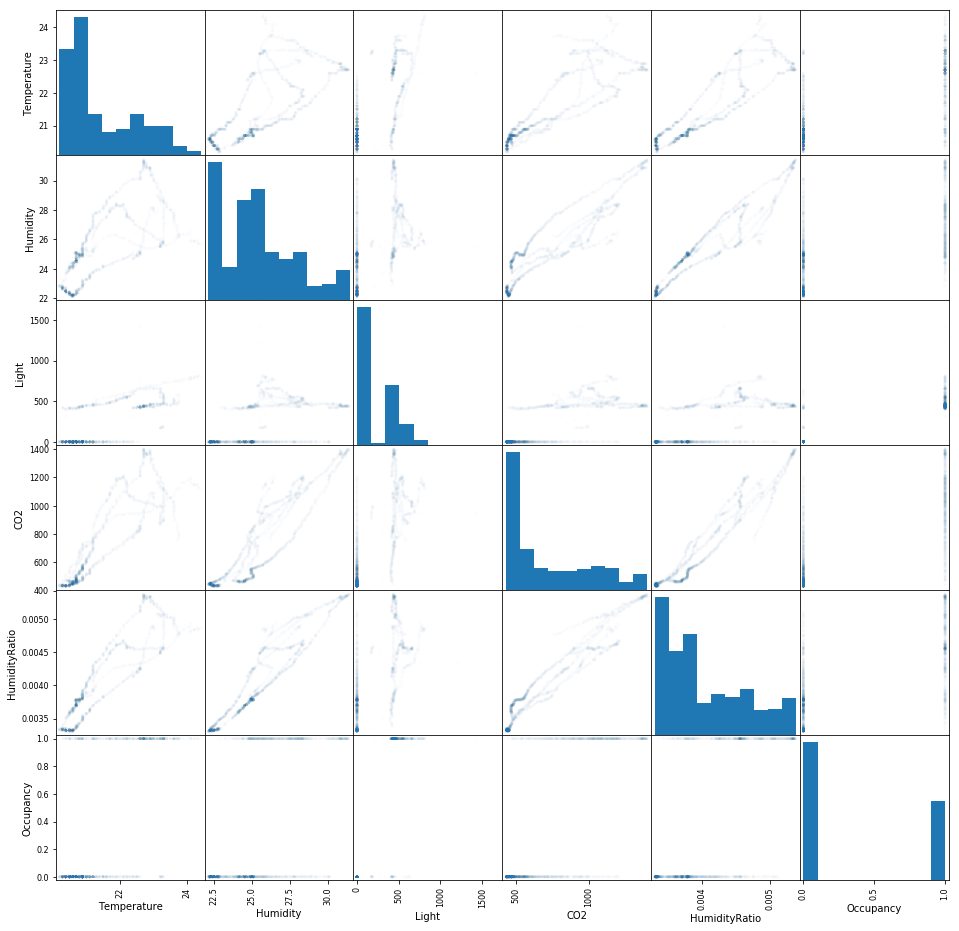

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (16, 16))
pass

Зависимость скорости температуры и СО2:

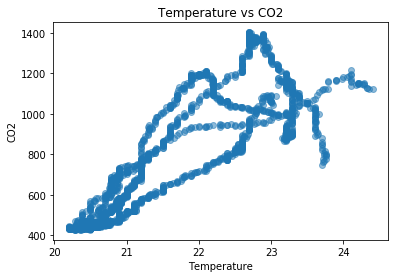

In [11]:
plt.plot(data['Temperature'], data['CO2'], 'o', alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('CO2')
plt.title('Temperature vs CO2')
pass

Из этого видим, что в целом просматривается следующее: чем больше температура, тем больше СО2.

Построим диаграмму рассеяния для Температуры и СО2, когда люди находились в комнате и не находились.:

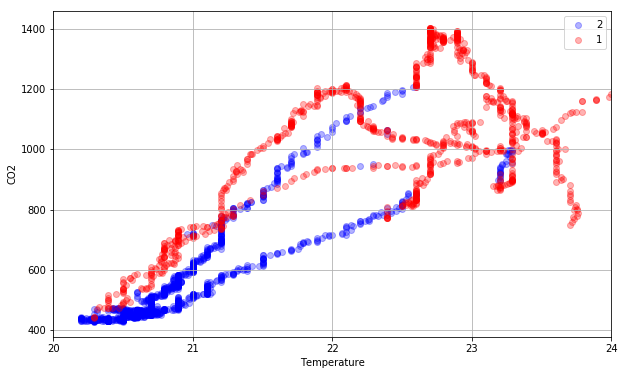

In [12]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Occupancy'] == 0]['Temperature'],
            data[data['Occupancy'] == 0]['CO2'],
            alpha = 0.3,
            label = '2',
            color = 'b')

plt.scatter(data[data['Occupancy'] == 1]['Temperature'],
            data[data['Occupancy'] == 1]['CO2'],
            alpha = 0.3,
            label = '1',
            color = 'r')

plt.xlabel('Temperature')
plt.xticks(range(1, 25))
plt.xlim(20, 24)
plt.ylabel('CO2')
plt.legend()
plt.grid()

Не трудно заметить, что в наполненном людьми помещении температура и концетрация СО2 выше.

#### Перед нами будет стоять задача по определению размещения офисного помещения в зависимости от измеренных характеристик с использованием статистических моделей обучения.

## Подготовка данных

Алгоритмы машинного обучения из библиотеки scikit-learn не работают напрямую с категориальными признаками и данными, в которых имеются пропущенные значения. Поэтому вначале подготовим наши данные.

Разделим имеющиеся столбцы на категориальные и на числовые

In [5]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['date']
['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


## Обрабатка пропущенных значений

In [5]:
data[numerical_columns].count(axis = 0)

Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
Occupancy        2665
dtype: int64

Не трудно заметить, что пропущенных значений нет.

Применим метод векторизации

## Векторизация категориальных признаков

Будет сделано следующее:
1. Для небинарных категориальных признаков:
    - Вместо N значений признака будет использоваться N признаков со значением 0 или 1 (в зависимости от значения исходного признака), таким образом, получив вектор сумма элементов которого всегда равна 1 (в силу того, что пропуски уже устранены)
2. Для бинарных категориальных признаков:
    - Вместо категории будем использовать число - 0 или 1 соответственно

In [6]:
categorical_columns = pd.get_dummies(data[categorical_columns])
print(categorical_columns.columns)

Index(['date_2015-02-02 14:19:00', 'date_2015-02-02 14:19:59',
       'date_2015-02-02 14:21:00', 'date_2015-02-02 14:22:00',
       'date_2015-02-02 14:23:00', 'date_2015-02-02 14:23:59',
       'date_2015-02-02 14:25:00', 'date_2015-02-02 14:25:59',
       'date_2015-02-02 14:26:59', 'date_2015-02-02 14:28:00',
       ...
       'date_2015-02-04 10:34:00', 'date_2015-02-04 10:34:59',
       'date_2015-02-04 10:36:00', 'date_2015-02-04 10:37:00',
       'date_2015-02-04 10:38:00', 'date_2015-02-04 10:38:59',
       'date_2015-02-04 10:40:00', 'date_2015-02-04 10:40:59',
       'date_2015-02-04 10:41:59', 'date_2015-02-04 10:43:00'],
      dtype='object', length=2665)


## Нормализация 

In [7]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Поскольку столбец Occupancy содержит ответ, то убёрем его:

In [8]:
data_numerical = data[numerical_columns]
data_numerical = data_numerical.drop(('Occupancy'), axis = 1)
data_core = data['Occupancy']
data_numerical.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027
std,1.028024,2.436842,250.210906,292.681718,0.000611
min,20.200000,22.100000,0.000000,427.500000,0.003303
25%,20.650000,23.260000,0.000000,466.000000,0.003529
50%,20.890000,25.000000,0.000000,580.500000,0.003815
75%,22.356667,26.856667,442.500000,956.333333,0.004532
max,24.408333,31.472500,1697.250000,1402.250000,0.005378


Нормализуем количественные признаки. Приведём к мат. ожиданию = 0 и дисперсии = 1:

In [9]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()
print(data_numerical.shape)
print (data_numerical.columns)

(2665, 5)
Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')


## Соединяем в одну таблицу

In [10]:
#Объединим данные. Вообщем я решил не включать дату считывания показания, ибо она нафиг не нужна.
data = pd.concat((data_numerical, data_core), axis = 1)
print(data.shape)

(2665, 6)


In [16]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2665.000000
mean,3.301398e-13,1.356563e-14,6.292236e-16,-2.132961e-17,6.507665e-14,0.364728
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.481444
min,-1.200241e+00,-1.335309e+00,-7.722587e-01,-9.922262e-01,-1.185274e+00,0.000000
25%,-7.625076e-01,-8.592828e-01,-7.722587e-01,-8.606840e-01,-8.148558e-01,0.000000
50%,-5.290501e-01,-1.452440e-01,-7.722587e-01,-4.694740e-01,-3.471171e-01,0.000000
75%,8.976349e-01,6.166709e-01,9.962493e-01,8.146285e-01,8.263135e-01,1.000000
max,2.893373e+00,2.510857e+00,6.011019e+00,2.338183e+00,2.212265e+00,1.000000


In [ ]:
data_numerical.count(axis = 0)

Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
dtype: int64

## X и y

Х — все столбцы, за исключением Occupancy.

Y — занятость помещения (Occupancy).

In [11]:
X = data.drop(('Occupancy'), axis = 1)
y = data['Occupancy']
feature_names = X.columns

In [18]:
type(feature_names)

pandas.core.indexes.base.Index

In [19]:
feature_names

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

In [12]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2665, 5)
(2665,)


In [22]:
type(X)

pandas.core.frame.DataFrame

In [21]:
type(y)

pandas.core.series.Series

#### Обучающая и тестовая выборки

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1865 800


### KNN – метод ближайших соседей

Объявляем классификатор с параметром k = 15. Проводим обучение модели на обучающей выборке X_train, y_train:

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [15]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

Применяем метод predict. Считаем среднюю ошибку:

In [16]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)


print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0193029490616622
Error test: 0.02


## Подбор параметров

Найдем такое значение параметра k, при котором значение ошибки будет минимальным:

In [17]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.012332439678284235 1


Применим алгоритм еще раз с новым параметром k:

In [18]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0
Error test: 0.01


# ДЗ №2

## Нейронные сети

Решим задачу классификации (определение занятости комнаты) при помощи нейронных сетей. Разобъем данные на тестовую и обучающую выборки:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

### Обучаем классификатор

Проведем обучение классификатора вида многослойного персептрона. Активационная функция: сигмоида. С количеством нейронов равным 100:

Проведем обучение однослойной сети с количеством нейронов равным 10:

In [13]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)



MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=54, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))


0.01904761904761905 0.022727272727272728


Наблюдается переобучение, т.к. ошибка на тестовой выборке выше, чем на обучающей. Попробуем увеличить количество нейронов на скрытом слое:

In [14]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=54, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [34]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.00784313725490196 0.015909090909090907


Заметим, что при изменении количества нейронов удалось избавиться от переобучения, значение ошибки значительно уменьшилось. Найдем оптимальной количество нейрнов для однослойной сети:

In [35]:
nodes_arr_1 = np.arange(10, 210, 10)
test_err = []
train_err = []
for nodes in nodes_arr_1:
    mlp_model = MLPClassifier(hidden_layer_sizes = (nodes,), solver = 'lbfgs',
                              activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))



Минимальное значение ошибки:
0.0011204481792717086 0.013636363636363636
Оптимальное значение количества нейронов:
130


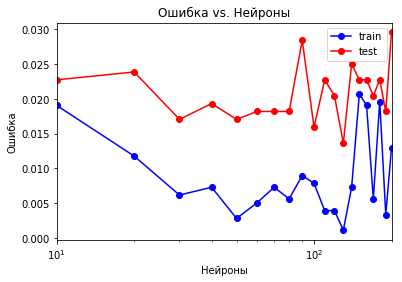

In [36]:
print("Минимальное значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное значение количества нейронов:")
nodes_opt_1 = nodes_arr_1[test_err == min_test_err][0]
print(nodes_opt_1)

plt.semilogx(nodes_arr_1, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr_1, test_err, 'r-o', label = 'test')
plt.xlim([np.min(nodes_arr_1), np.max(nodes_arr_1)])
plt.title('Ошибка vs. Нейроны')
plt.xlabel('Нейроны')
plt.ylabel('Ошибка')
plt.legend()
pass

Отсюда можно сделать вывод, что необходимый минимум при использовании однослойной сети достигается при количестве нейронов, равному 130. Проследим за изменениями при использовании двуслойной сети с различным количеством нейронов:

In [17]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,10), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=54, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.012324929971988795 0.02159090909090909


Наблюдается переобучение, т.к. ошибка на тестовой выборке выше, чем на обучающей.

In [19]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=54, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.01288515406162465 0.017045454545454544


Переобучение по прежнему наблюдается. Найдем оптимальной количество нейрнов для двухслойной сети: 

In [15]:
nodes_arr_2 = np.arange(10, 210, 20)
test_err = []
train_err = []
for nodes in nodes_arr_2:
    mlp_model = MLPClassifier(hidden_layer_sizes = (nodes, nodes), solver = 'lbfgs',
                              activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Минимальное значение ошибки:
0.008403361344537815 0.013636363636363636
Оптимальное значение количества нейронов:
50


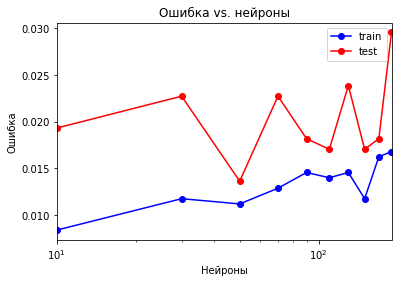

In [16]:
print("Минимальное значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное значение количества нейронов:")
nodes_opt_2 = nodes_arr_2[test_err == min_test_err][0]
print(nodes_opt_2)

plt.semilogx(nodes_arr_2, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr_2, test_err, 'r-o', label = 'test')
plt.xlim([np.min(nodes_arr_2), np.max(nodes_arr_2)])
plt.title('Ошибка vs. нейроны')
plt.xlabel('Нейроны')
plt.ylabel('Ошибка')
plt.legend()
pass

## Подбор гиперпараметров

Подберем оптимальное значение параметра регуляризации alpha:

### Подбор параметра регуляризации alpha

Минимальное значение ошибки:
0.005042016806722689 0.013636363636363636
Оптимальное значение alpha:
1e-05


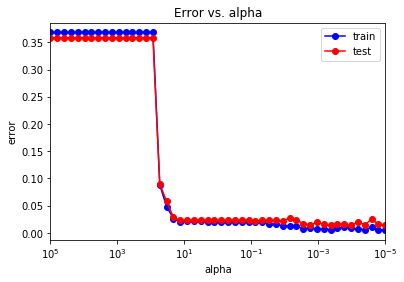

In [17]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (nodes_opt_2, nodes_opt_2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Минимальное значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное значение alpha:")
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

### Классификатор на найденных оптимальных значениях

In [18]:
#Да и вообще - данные сильно коррелированы.
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (nodes_opt_2, nodes_opt_2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибки на обучающей и тестовой выборках:")
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Ошибки на обучающей и тестовой выборках:
0.012324929971988795 0.020454545454545454


# ДЗ №3

## Random forest

Решим задачу классификации (определение занятости комнаты) с помощью Random Forest.

На исходном наборе данных с помощью нейронных сетей решается задача классификации, 
а именно определение занятости комнаты с помощью Random.
Разобьем данные на обучающую и тестовую выборки

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Обучаем классификатор вида Random Forest. Число деревьев = 100:

In [17]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках:

In [18]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.014772727272727272


Наблюдаем переобучение: ошибка на тестовой выборке выше, чем на обучающей.

Построим график зависимости ошибки на обучающей и тестовой выборках,
Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках:а также out-of-bag ошибки (oob-ошибки) от количества деревьев.:

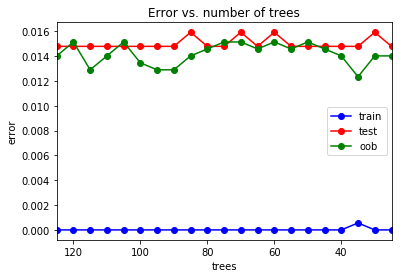

In [19]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Переобучение наблюдается на всем экспериментальном множестве количества деревьев.

Минимальное значение ошибки:

In [20]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.014772727272727272


Оптимальное количество деревьев:

In [21]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

25


## Extremely Randomized Trees

На исходном наборе данных с помощью нейронных сетей решается задача классификации, 
а именно определение занятости комнаты с помощью Extremely Randomized Trees.
Разобьем данные на обучающую и тестовую выборки:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Обучаем классификатор вида Extremely Randomized Trees. Число деревьев = 100:

In [23]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Считаем среднюю ошибку:

In [24]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.015909090909090907


Наблюдаем переобучение: ошибка на тестовой выборке выше, чем на обучающей.
Построим график зависимости ошибки на обучающей и тестовой выборках,
а также out-of-bag ошибки (oob-ошибки) от количества деревьев:

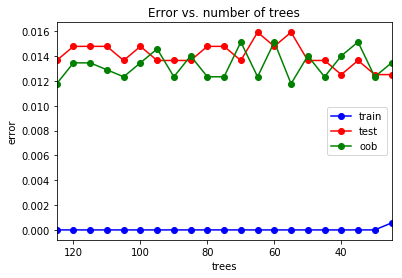

In [25]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = trees, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Переобучение наблюдается на всем экспериментальном множестве количества деревьев.

Минимальное значение ошибки:

In [26]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0125


Оптимальное количество деревьев:

In [27]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

25


## AdaBoost

На исходном наборе данных с помощью нейронных сетей решается задача классификации, 
а именно определение занятости комнаты с помощью AdaBoost.
Разобьем данные на обучающую и тестовую выборки:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Обучаем классификатор вида AdaBoost. Количество классификаторов = 100:

In [29]:
ab = ensemble.AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

Считаем среднюю ошибку:

In [30]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print(err_train, err_test)

0.0 0.015909090909090907


Наблюдаем переобучение: ошибка на тестовой выборке выше, чем на обучающей.

Построим график зависимости ошибки на обучающей и тестовой выборках.:

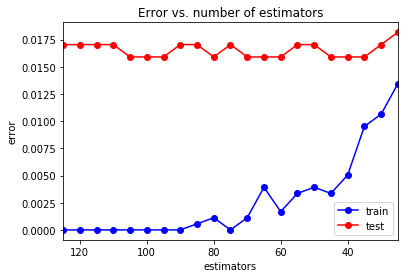

In [31]:
estim_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
for estim in estim_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estim)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

plt.plot(estim_arr, train_err, 'b-o', label = 'train')
plt.plot(estim_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(estim_arr), np.min(estim_arr)])
plt.title('Error vs. number of estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

Наблюдаем переобучение

Минимальное значение ошибки:

In [32]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.015909090909090907


Оптимальное количество классификаторов:

In [33]:
estim_opt = estim_arr[test_err == min_test_err]
estim_opt = estim_opt[0]
print(estim_opt)

35


## Gradient Boosted Trees

На исходном наборе данных с помощью нейронных сетей решается задача классификации, 
а именно определение занятости комнаты с помощью Gradient Boosted Trees.
Разобьем данные на обучающую и тестовую выборки:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Обучаем классификатор вида Gradient Boosted Trees. Число деревьев = 100:

In [35]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Считаем среднюю ошибку:

In [ ]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print(err_train, err_test)

Наблюдаем переобучение: ошибка на тестовой выборке выше, чем на обучающей.

Построим график зависимости ошибки на обучающей и тестовой выборках:

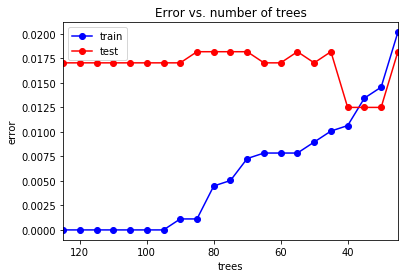

In [36]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Наблюдаем переобучение

Минимальное значение ошибки:

In [37]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0125


Оптимальное количество деревьев:

In [38]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

30


# ДЗ №4

## Principal component analysis (PCA)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X)
X_pca.shape

(2665, 5)

Разделим данные на тестовую и обучающие выборки:

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 42)

Обучаем классификатор вида Extremely Randomized Trees. Число деревьев = 100:

In [41]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Считаем среднюю ошибку:

In [ ]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

Наблюдаем переобучение

Построим график зависимости ошибки на тестовой и обучающей выборках от количества компонент в методе:

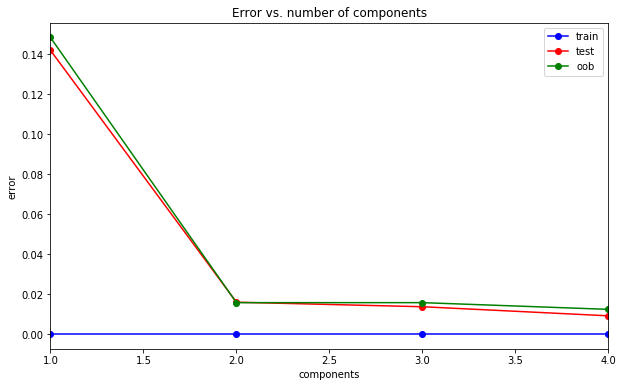

In [42]:
components_arr = np.arange(1, 5, 1)
test_err = []
train_err = []
oob_err = []
for components in components_arr:
    pca = PCA(n_components = components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 42)

    ert = ensemble.ExtraTreesClassifier(n_estimators = 100, bootstrap = True, oob_score = True)
    ert.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

plt.figure(figsize = (10, 6))
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. number of components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

Наблюдаем переобучение:

In [43]:
print("Минимальная ошибка:")
print(np.min(train_err), np.min(test_err))
print("Оптимальное количество компонент:")
print(components_arr[test_err == np.min(test_err)][0])

Минимальная ошибка:
0.0 0.00909090909090909
Оптимальное количество компонент:
4
